In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split

In [63]:
d=pd.read_csv('Admission_Predict_Ver1.1.csv')
d.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [65]:
del d['Serial No.']

In [66]:
d.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [67]:
d['Chance of Admit ']=d['Chance of Admit '].apply(lambda x:1 if x>=0.75 else 0)

In [68]:
d.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [69]:
x=d.iloc[:,0:7]
y=d.iloc[:,7]

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [71]:
print("x_train : ",str(x_train.shape))
print("x_test : ",str(x_test.shape))
print("y_train : ",str(y_train.shape))
print("y_test : ",str(y_test.shape))

x_train :  (375, 7)
x_test :  (125, 7)
y_train :  (375,)
y_test :  (125,)


In [72]:
gini=DecisionTreeClassifier(criterion='gini')
entropy=DecisionTreeClassifier(criterion='entropy')

In [73]:
gini.fit(x_train,y_train)
entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [74]:
y_train_pred_gini=gini.predict(x_train)
y_test_pred_gini=gini.predict(x_test)

In [80]:
y_train_pred_entropy=entropy.predict(x_train)
y_test_pred_entropy=entropy.predict(x_test)

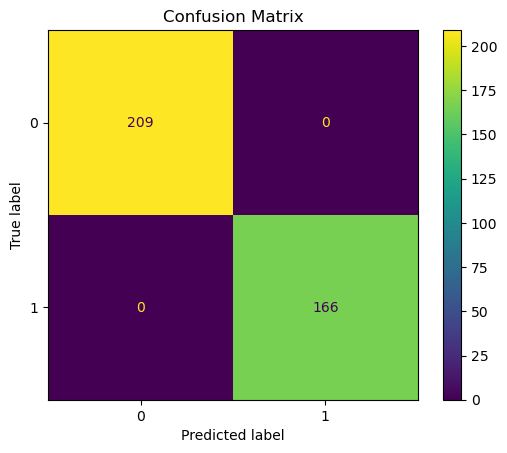

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       166

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



In [81]:
ConfusionMatrixDisplay.from_predictions(y_train_pred_gini,y_train)
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_train_pred_gini,y_train))

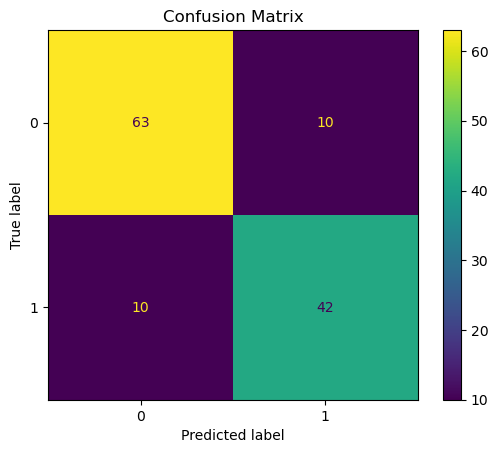

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        73
           1       0.81      0.81      0.81        52

    accuracy                           0.84       125
   macro avg       0.84      0.84      0.84       125
weighted avg       0.84      0.84      0.84       125



In [82]:
ConfusionMatrixDisplay.from_predictions(y_test_pred_gini,y_test)
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test_pred_gini,y_test))

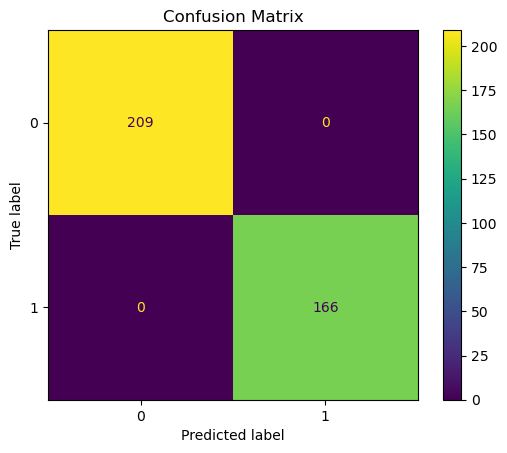

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       166

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



In [83]:
ConfusionMatrixDisplay.from_predictions(y_train_pred_entropy,y_train)
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_train_pred_entropy,y_train))

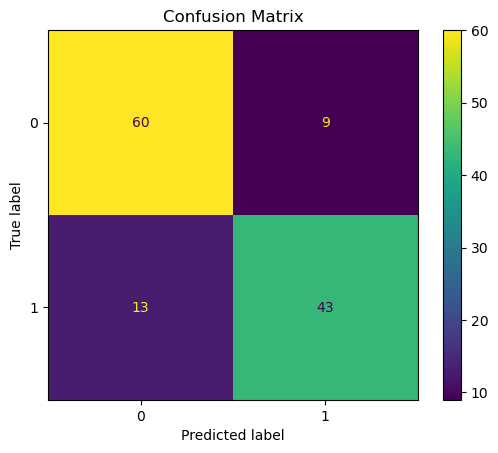

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        69
           1       0.83      0.77      0.80        56

    accuracy                           0.82       125
   macro avg       0.82      0.82      0.82       125
weighted avg       0.82      0.82      0.82       125



In [84]:
ConfusionMatrixDisplay.from_predictions(y_test_pred_entropy,y_test)
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test_pred_entropy,y_test))

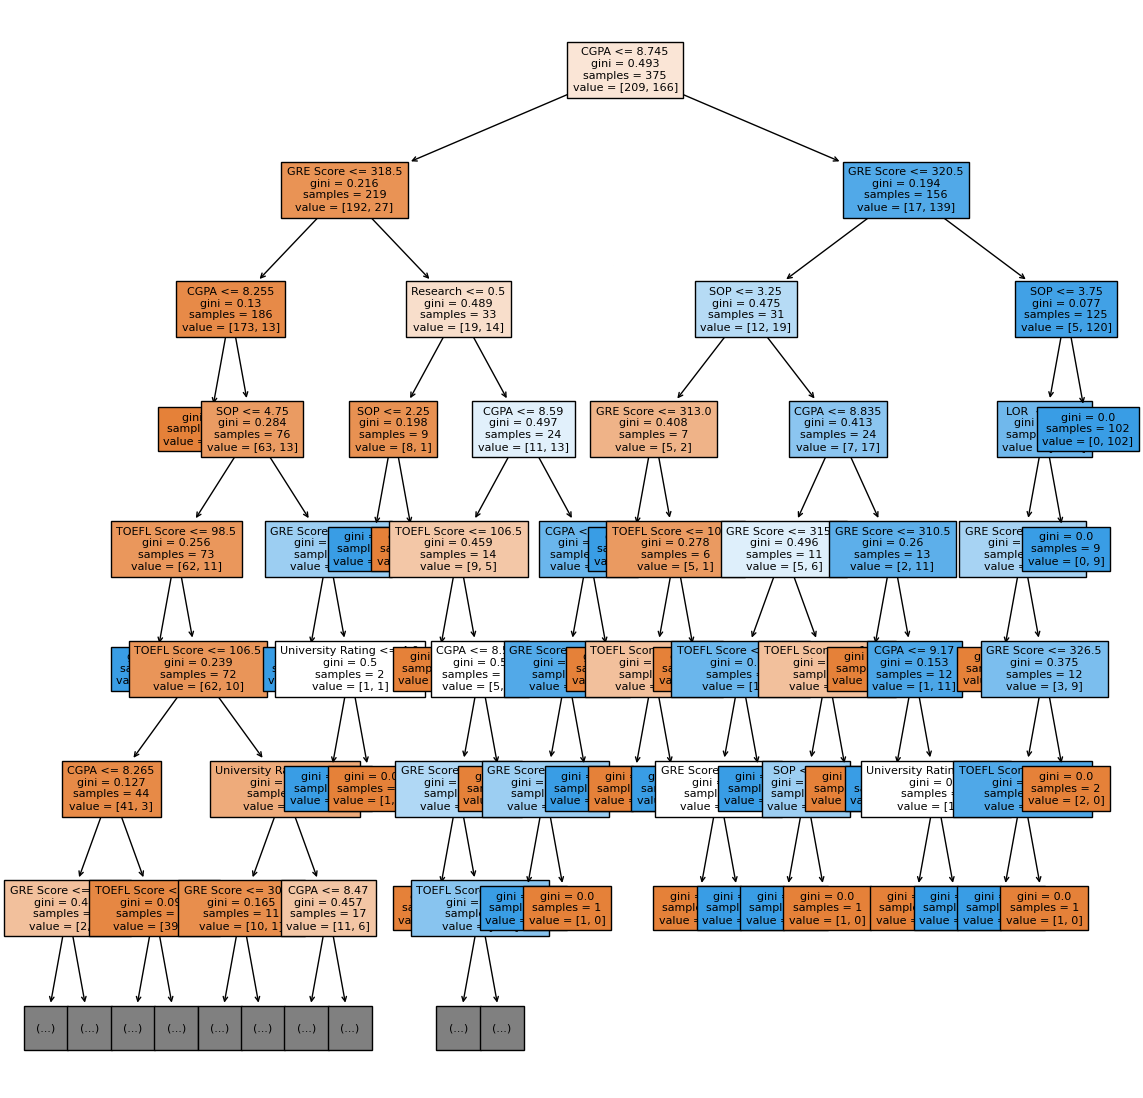

In [85]:
plt.figure(figsize=(14,14))
plot_tree(gini,fontsize=8,max_depth=7,filled=True,feature_names=list(d.columns))
plt.show()

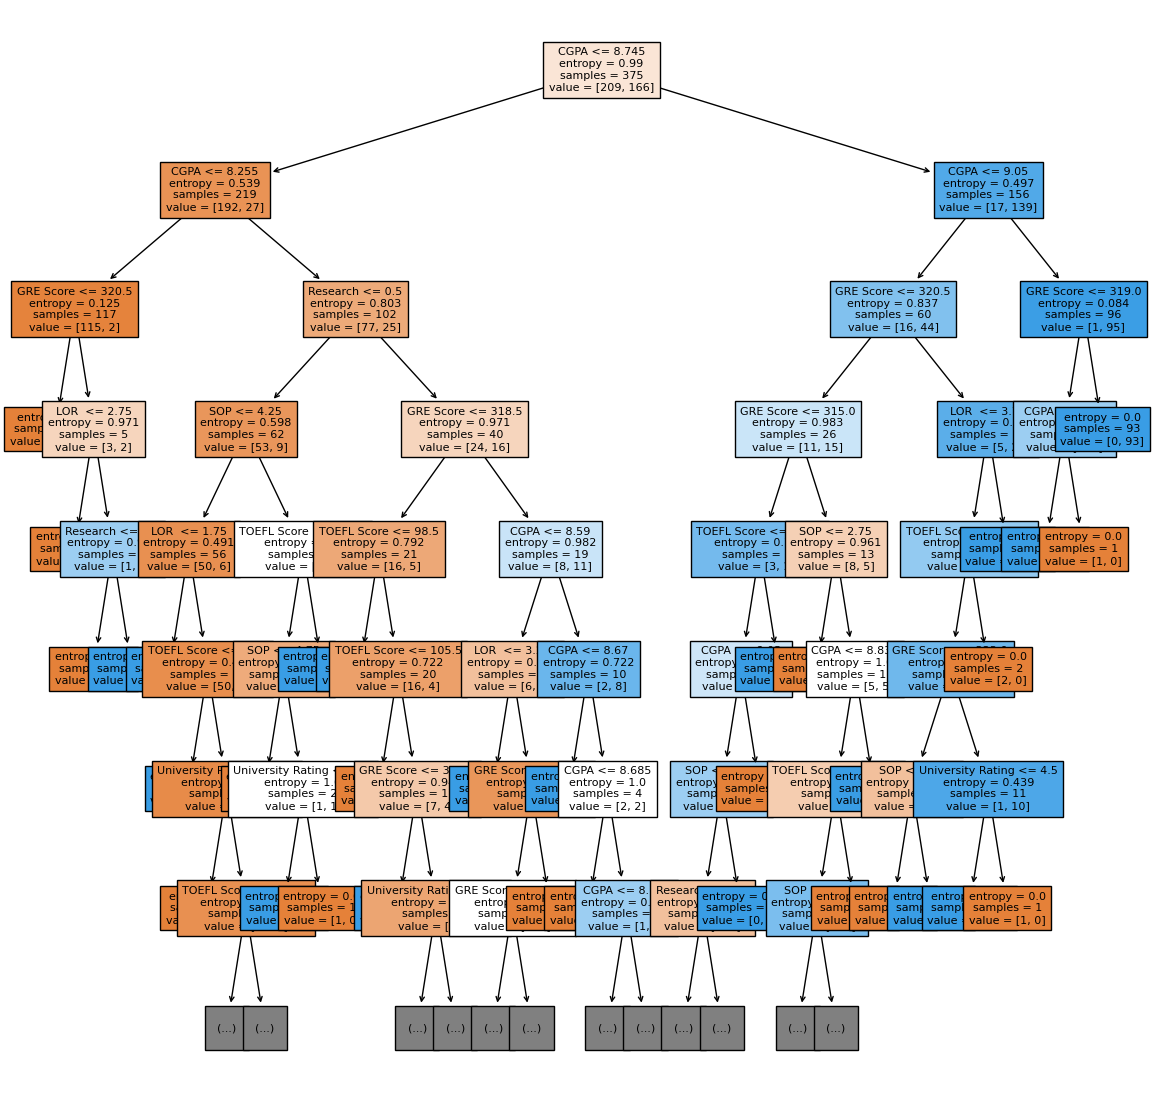

In [87]:
plt.figure(figsize=(14,14))
plot_tree(entropy,fontsize=8,max_depth=7,filled=True,feature_names=list(d.columns))
plt.show()